In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv("CRData17.csv")
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
x = dataset.iloc[:,[4,8]].values
y = dataset.iloc[:,20].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
imputer = Imputer(missing_values= 'Nan', strategy='mean',axis = 0)
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

y_pred=logreg.predict(x_test)

In [5]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[69,  0],
       [ 7, 16]])

Text(0.5,257.44,'Predicted label')

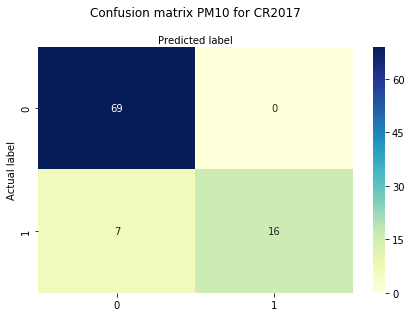

In [8]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix PM10 for CR2017', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9239130434782609
Precision: 1.0
Recall: 0.6956521739130435
